# Approximating the Sine function with a constant depth multi-layer perceptron
## Goal
In this notebook we investigate the task of approximating a portion of the sine function, namely
$$y=\sin\,x\qquad\textrm{for}\,-4\le\,x\le\,4$$
with a multi-layer perceptron with:
- constant depth
- non-linearities (activation functions) set to `ReLU`, `Sigmoid`, or `Softplus`,
- full gradient descent.

We investigate the effect of varying
- `width`, i.e. the dimension of the inputs and outputs of the hidden layers,  
- `depth`, i.e. the number of layers,  
- the non-linearities.

## The vanishing gradient problem
Simulations in this notebook show all appearances of the vanishing gradient problem.  Further work is needed to verify that this is indeed the case.

### Remark on the learning rate
The value of the learning rate `lr` does not play a qualitative role in the experiments.  Its impact is only on the rate of convergence, when the model is indeed able to learn, and when the model is not able to learn with the value of `lr`, it is unlikely that it will start learning by changing this value for `lr`.

## Some findings
###  `depth=3` or less
With `non_linearity` set to any of `'softplus', 'sigmoid', 'relu'`, the model learns (consistently).  More specifically, with `'softplus'` the loss shows some jitter at some initial step in the training, with `'sigmoid'` the loss shows some persistent osciallating but overall decays, and with `'relu'` the loss shows some noisy changes but overall decays.


### `depth=4` or `5`
- With `non_linearity='sigmoid'`, the model does not learn no matter what `width` is set to (tested with `2` and up to `50`).  This is likely  an instance of the vanishing gradient problem and other scenarios seem to concur.
- With `non_linearity='relu'`, the model does not consistently learn: sometimes not at all, sometimes only a portion of one cycle of the Sine function, sometimes it does learn.
- With `non_linearity='softplus'` and `width` down to `3`, the model learns, although the loss remains approximately constant during an initial phase during the training.  When `width` is set to `2`, the model learns the best it can.  That is, the portion of the Sine function seems to be out of reach of the model, and the model is presumably producing the optimal approximator.


---
tags: pytorch, tutorial, sequential, universal approximation, function approximation, feedforward, mlp, sine function, vanishing gradient

# Imports

In [1]:
from tqdm import tqdm
from collections import OrderedDict
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function

In [2]:
def GD_train(depth=1, width=2, non_linearity='sigmoid', lr=.1, n_epochs=20):
    # Train with (classical) gradient descent
    # Set non-linearity (activation function)
    if non_linearity == 'relu':
        non_linearity = nn.ReLU
    elif non_linearity == 'sigmoid':
        non_linearity = nn.Sigmoid
    elif non_linearity == 'softplus':
        non_linearity = nn.Softplus

    # Define layers
    input_layer = [nn.Linear(1, width), non_linearity()]
    list_linearities = [nn.Linear(width, width) for _ in range(depth)]
    list_non_linearities = [non_linearity() for _ in range(depth)]
    hidden_layers = [module for pair in zip(list_linearities, list_non_linearities) for module in pair]
    output_layer = [nn.Linear(width, 1)]

    # Instantiate model
    model = nn.Sequential(
        *input_layer,
        *hidden_layers,
        *output_layer
    )

    # Loss function
    criterion = nn.MSELoss()
    
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Data
    x = torch.linspace(-4, 4, 101).view(-1, 1)
    with torch.no_grad():
        targs = x.sin()

    losses = []

    # Training
    for _ in tqdm(range(n_epochs)):
        preds = model(x)
        loss = criterion(preds, targs)
        loss.backward()
        optimizer.step()

        model.zero_grad()
        losses.append(loss.item())

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    ax = axs[0]
    ax.plot(losses)
    ax.set_title("training loss (MSE)", fontsize=20)
    ax.set_yscale('log')
    ax.set_xlabel("epoch (iteration) index", fontsize=14)
    ax.set_ylabel("loss", fontsize=14)
    ax.grid();

    ax = axs[1]
    ax.plot(x, targs, label="target")
    ax.plot(x, preds.detach().numpy(), label="last approximation");
    ax.set_title("approximation after training", fontsize=20)
    ax.set_xlabel("x", fontsize=14)
    ax.set_ylabel("y", fontsize=14)
    ax.legend()
    ax.grid();
    
    results = {'fig': fig, 'axs': axs, 'losses': losses, 'targs': targs, 'preds': preds}
    
    return results

# Depth 1

# Scenario 1

100%|██████████| 10000/10000 [00:03<00:00, 2685.00it/s]


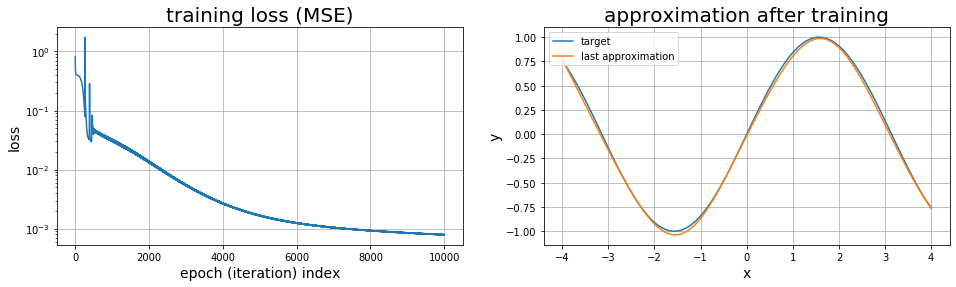

In [3]:
depth = 1
width = 5
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 2

100%|██████████| 10000/10000 [00:03<00:00, 2884.57it/s]


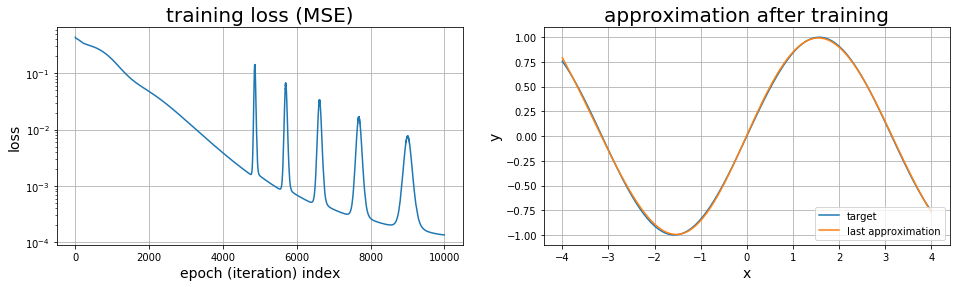

In [4]:
depth = 1
width = 5
non_linearity = 'sigmoid'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 3

100%|██████████| 10000/10000 [00:03<00:00, 2876.97it/s]


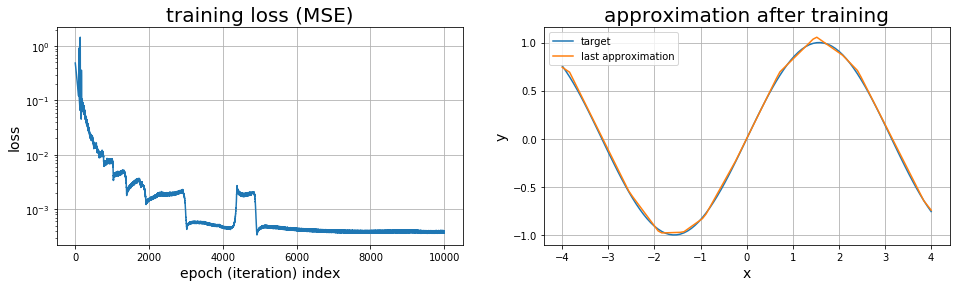

In [5]:
depth = 1
width = 5
non_linearity = 'relu'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Depth 2

# Scenario 4

100%|██████████| 10000/10000 [00:05<00:00, 1969.14it/s]


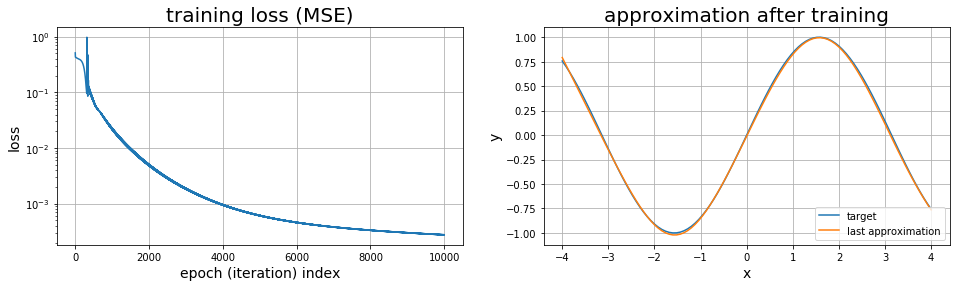

In [6]:
depth = 2
width = 5
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 5

100%|██████████| 10000/10000 [00:04<00:00, 2284.26it/s]


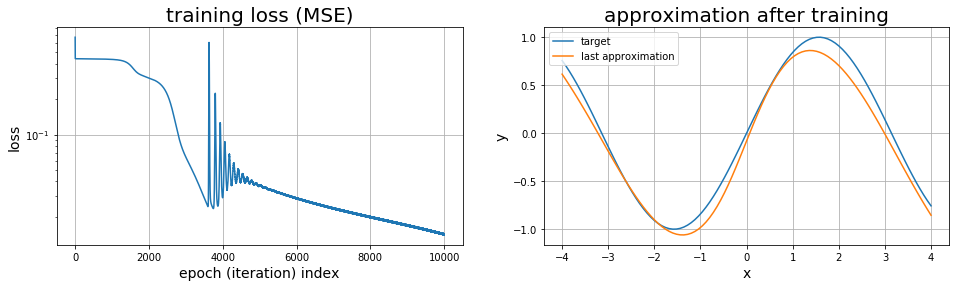

In [7]:
depth = 2
width = 5
non_linearity = 'sigmoid'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 6

100%|██████████| 10000/10000 [00:04<00:00, 2183.67it/s]


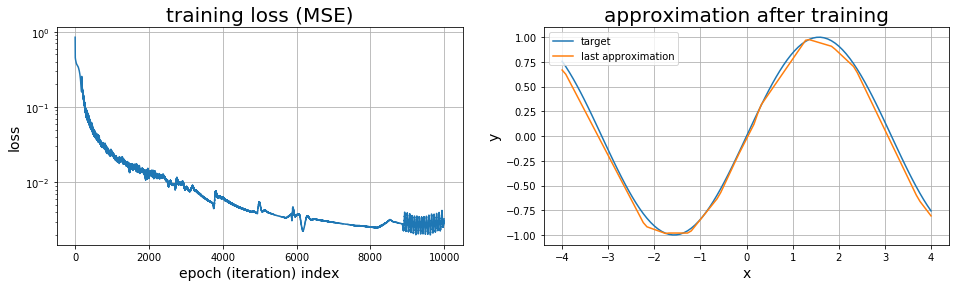

In [8]:
depth = 2
width = 5
non_linearity = 'relu'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Depth 3

# Scenario 7

100%|██████████| 10000/10000 [00:05<00:00, 1713.82it/s]


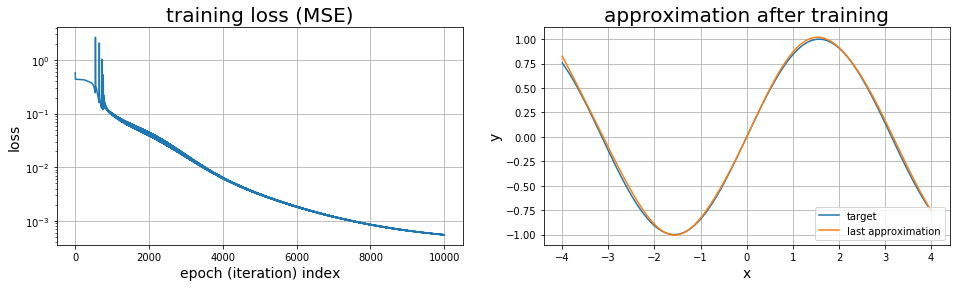

In [9]:
depth = 3
width = 5
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 8

100%|██████████| 10000/10000 [00:05<00:00, 1881.01it/s]


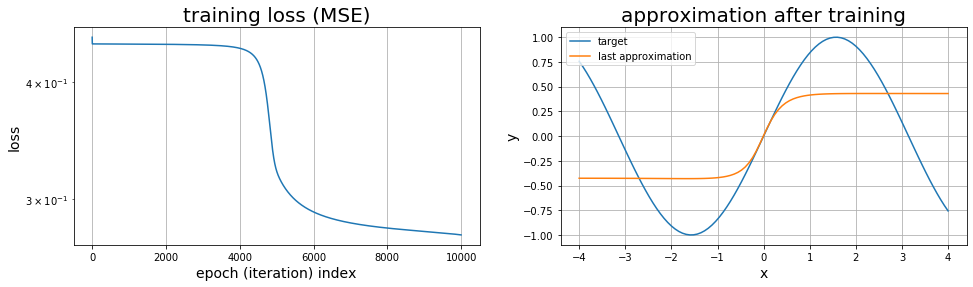

In [10]:
depth = 3
width = 5
non_linearity = 'sigmoid'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario 9

100%|██████████| 10000/10000 [00:05<00:00, 1950.07it/s]


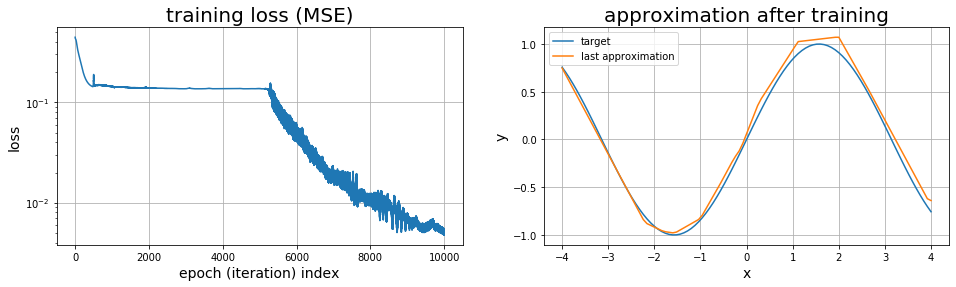

In [11]:
depth = 3
width = 5
non_linearity = 'relu'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Depth 4

# Scenario

100%|██████████| 10000/10000 [00:05<00:00, 1716.41it/s]


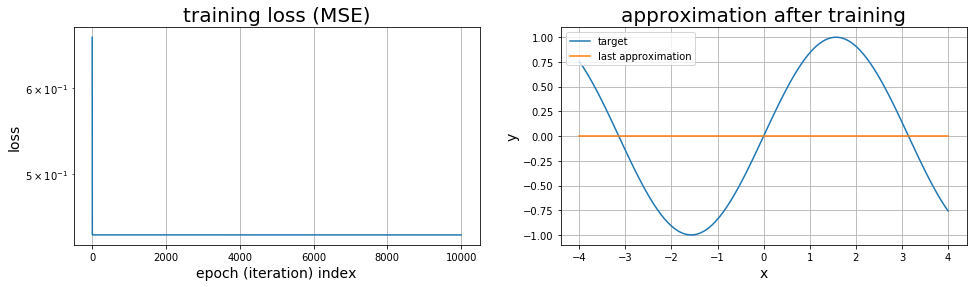

In [12]:
depth = 4
width = 5 # 2 # 5 50
non_linearity = 'sigmoid'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:05<00:00, 1718.69it/s]


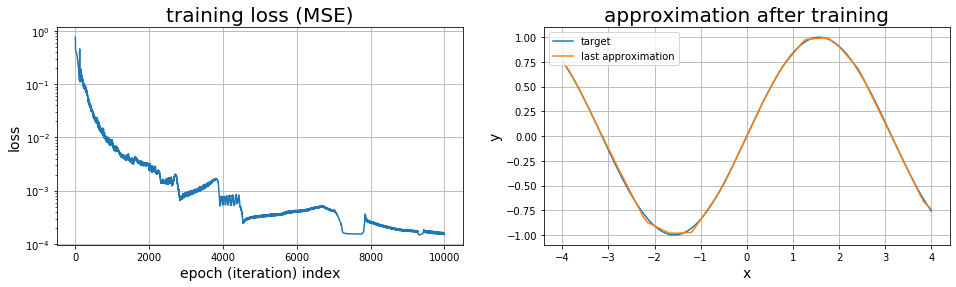

In [13]:
depth = 4
width = 5
non_linearity = 'relu'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:06<00:00, 1506.25it/s]


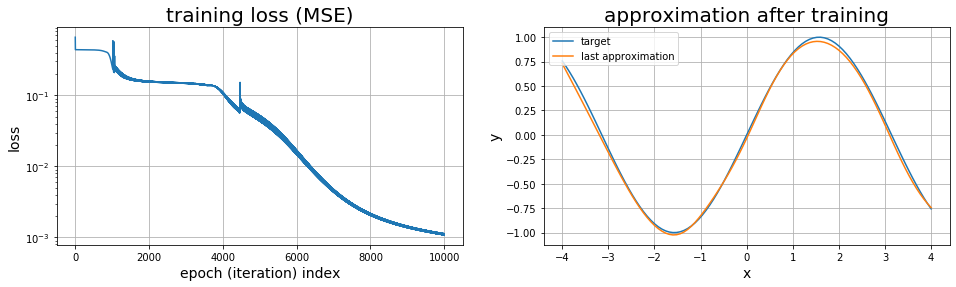

In [14]:
depth = 4
width = 5
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:06<00:00, 1588.79it/s]


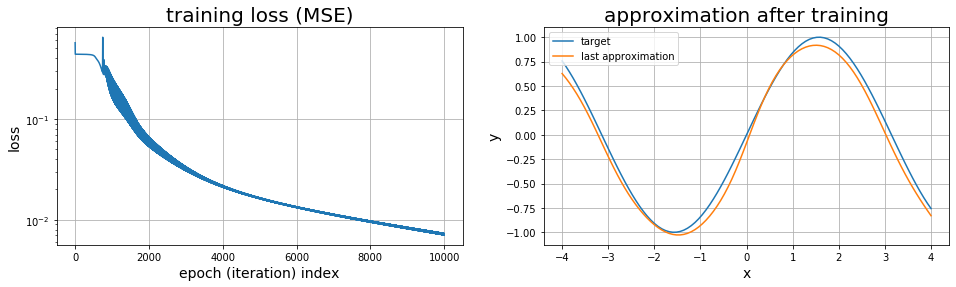

In [15]:
depth = 4
width = 3
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:06<00:00, 1614.01it/s]


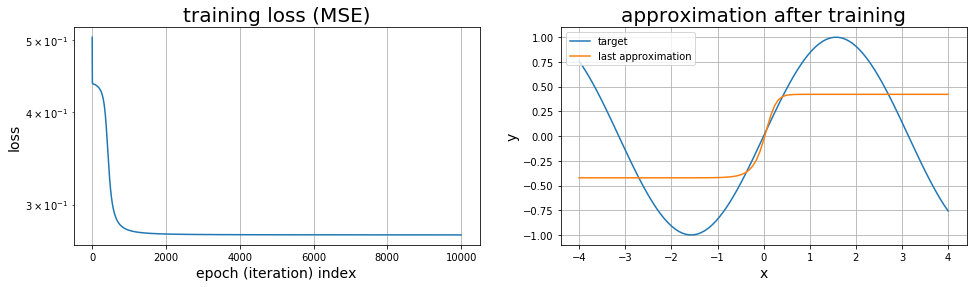

In [16]:
depth = 4
width = 2
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Depth 5

# Scenario

100%|██████████| 10000/10000 [00:06<00:00, 1493.96it/s]


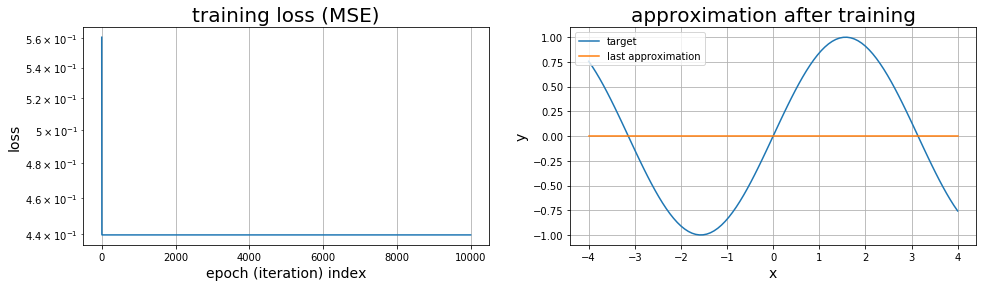

In [17]:
depth = 5
width = 5
non_linearity = 'sigmoid'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:06<00:00, 1496.56it/s]


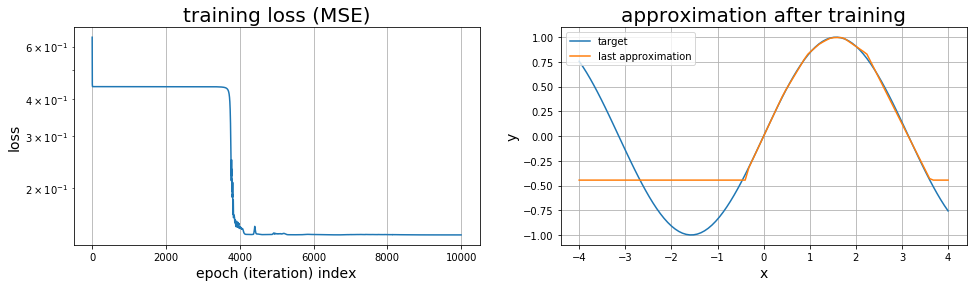

In [18]:
depth = 5
width = 5
non_linearity = 'relu'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

# Scenario

100%|██████████| 10000/10000 [00:07<00:00, 1349.47it/s]


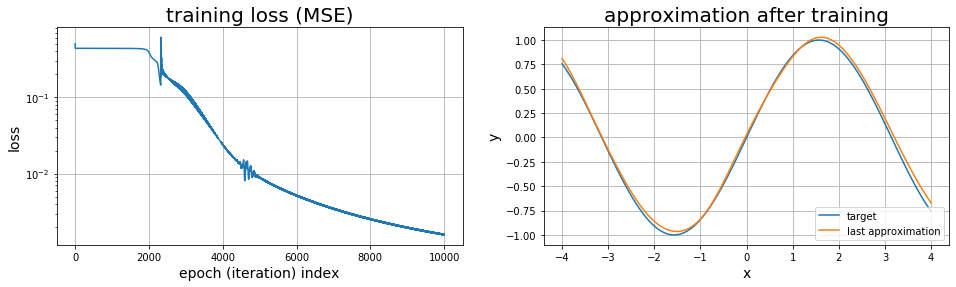

In [19]:
depth = 5
width = 3
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)

100%|██████████| 10000/10000 [00:06<00:00, 1443.67it/s]


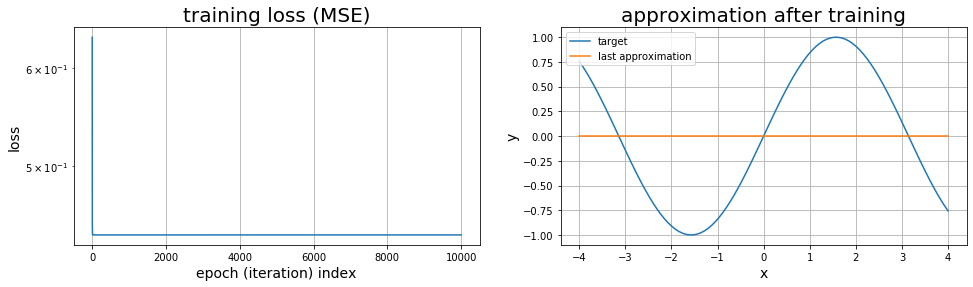

In [20]:
depth = 5
width = 2
non_linearity = 'softplus'
lr = .1
n_epochs = 10_000

results = GD_train(depth=depth, width=width, non_linearity=non_linearity, lr=lr, n_epochs=n_epochs)